# Packages

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import xarray as xr
from scipy.io import loadmat
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statistics as stats
from matplotlib.patches import Ellipse, Polygon

# Read data

In [4]:
filepath_SEAs = r'C:\Users\sbtin3\Documents\Python\Doc\SequentialExtractionCleaned.csv'
df_SEAs = pd.read_csv(filepath_SEAs)

# Define Data

In [5]:
MR = df_SEAs.head(4)
CG = df_SEAs.iloc[[4,5,6,7]]
JF = df_SEAs.iloc[[8,9,10,11]]
LG = df_SEAs.iloc[[12,13,14,15]]
CN = df_SEAs.iloc[[16,17,18,19]]
MR

,Site,Depth,Exchangable,Specifically Sorbed,Amorphous Fe/Al Oxides,Crystalline Fe/Al Oxides,Residual
0,MR,0-10,25.852000,108.342333,804.727000,144.411667,222.812667
1,NaN,10-20,95.410000,139.586000,4669.843000,457.287000,456.673333
2,NaN,20-30,112.756667,148.825333,4379.033333,545.990667,996.688333
3,NaN,30-50,211.215667,277.397333,4556.258333,648.711667,1135.710667


In [6]:
#I want to make an array of numbers that fit each case
#1. Average As concentration at each site
#MR
MREx = np.mean(MR['Exchangable'])
MRSp = np.mean(MR['Specifically Sorbed'])
MRAm = np.mean(MR['Amorphous Fe/Al Oxides'])
MRCr = np.mean(MR['Crystalline Fe/Al Oxides'])
MRRe = np.mean(MR['Residual'])

#CG
CGEx = np.mean(CG['Exchangable'])
CGSp = np.mean(CG['Specifically Sorbed'])
CGAm = np.mean(CG['Amorphous Fe/Al Oxides'])
CGCr = np.mean(CG['Crystalline Fe/Al Oxides'])
CGRe = np.mean(CG['Residual'])

#JF
JFEx = np.mean(JF['Exchangable'])
JFSp = np.mean(JF['Specifically Sorbed'])
JFAm = np.mean(JF['Amorphous Fe/Al Oxides'])
JFCr = np.mean(JF['Crystalline Fe/Al Oxides'])
JFRe = np.mean(JF['Residual'])

#LG
LGEx = np.mean(LG['Exchangable'])
LGSp = np.mean(LG['Specifically Sorbed'])
LGAm = np.mean(LG['Amorphous Fe/Al Oxides'])
LGCr = np.mean(LG['Crystalline Fe/Al Oxides'])
LGRe = np.mean(LG['Residual'])

#CN
CNEx = np.mean(CN['Exchangable'])
CNSp = np.mean(CN['Specifically Sorbed'])
CNAm = np.mean(CN['Amorphous Fe/Al Oxides'])
CNCr = np.mean(CN['Crystalline Fe/Al Oxides'])
CNRe = np.mean(CN['Residual'])

# Plots

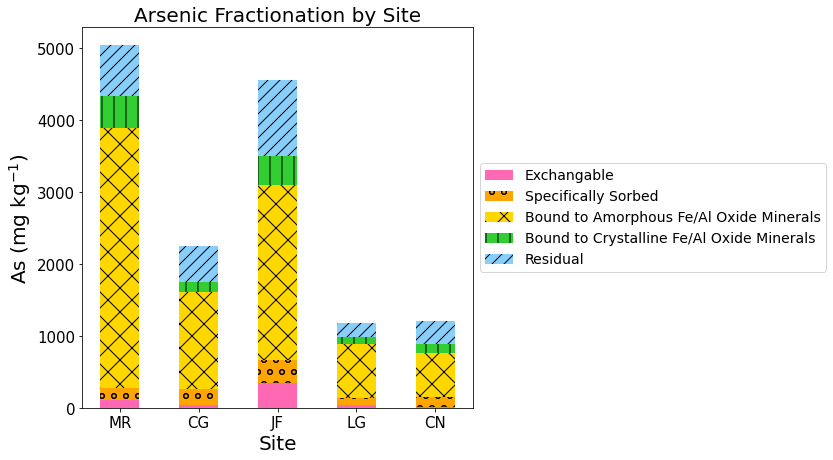

In [7]:
#This plot will show the different size fraction averages for all depths, separated by site
labels = ['MR', 'CG', 'JF', 'LG', 'CN']

#this defines my categories that go up the columns (the fractions), using the means I made in the previous box. Turning the values into arrays let me stack them properly later on.
Ex= np.array([MREx,CGEx,JFEx,LGEx,CNEx])
Sp= np.array([MRSp,CGSp,JFSp,LGSp,CNSp])
Am= np.array([MRAm,CGAm,JFAm,LGAm,CNAm])
Cr= np.array([MRCr,CGCr,JFCr,LGCr,CNCr])
Re= np.array([MRRe,CGRe,JFRe,LGRe,CNRe])

#this is the width of the bars/columns.
width = 0.5       

#BEGINNING OF ACTUAL PLOT 
fig, ax = plt.subplots(figsize=(7,7))
plt.bar(labels, Ex, width, label='Exchangable', color='hotpink')
plt.bar(labels, Sp, width, bottom=Ex,label='Specifically Sorbed',color='orange', hatch = "o")
plt.bar(labels, Am, width, bottom=Ex+Sp,label='Bound to Amorphous Fe/Al Oxide Minerals',color='gold', hatch = "x")
plt.bar(labels, Cr, width, bottom=Ex+Sp+Am,label='Bound to Crystalline Fe/Al Oxide Minerals',color='limegreen', hatch = "|")
plt.bar(labels, Re, width, bottom=Ex+Sp+Am+Cr,label='Residual',color='lightskyblue', hatch = "//")

#Titles and Labels
ax.set_title('Arsenic Fractionation by Site', fontsize=20)
ax.set_ylabel('As (mg kg$^{-1}$)',fontsize=20)
ax.set_xlabel('Site',fontsize=20)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=15) #this is the site names/percentages

#displays the plot
plt.show()
